In [ ]:
import pandas as pd
import numpy as np
import math
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Upload your train data text file with file name**

# **data_train.txt**

In [ ]:
read_file = pd.read_fwf (r'data_train.txt')
read_file.to_csv (r'example1.csv', index=None)
df1 = pd.read_csv('example1.csv')
df1.drop(df1.columns[[0,1,3,5,6,7,8,9,10]],axis =1)
df1.to_csv('example2.csv')
df2 = pd.read_csv('example2.csv')
df2 = df2.replace(',','', regex=True)
branch_load= []
branch= []
L1D= []
L1I= []
dTLB= []
iTLB= []
cache = []
cycle =[]
instr =[]
for i in df2.index:
    if(df2['events'][i] == 'branch-load-misses'):
        branch_load.append(df2['counts'][i])
    elif(df2['events'][i] == 'branch-misses:u'):
        branch.append(df2['counts'][i])
    elif(df2['events'][i] == 'L1-dcache-load-misses'):
        L1D.append(df2['counts'][i])
    elif(df2['events'][i] == 'L1-icache-load-misses'):
        L1I.append(df2['counts'][i])
    elif(df2['events'][i] == 'dTLB-load-misses'):
        dTLB.append(df2['counts'][i])
    elif(df2['events'][i] == 'iTLB-load-misses'):
        iTLB.append(df2['counts'][i])
    elif(df2['events'][i] == 'cache-misses:u'):
        cache.append(df2['counts'][i])
    elif(df2['events'][i] == 'instructions'):
        instr.append(df2['counts'][i])
    elif(df2['events'][i] == 'cycles'):
        cycle.append(df2['counts'][i])
cpi = []
for i in range(len(cycle)):
    cpi.append(float(cycle[i])/float(instr[i]))
def nor(l):
    l = [float(i) for i in l] 
    l = [(float(i)-min(l))/(max(l)-min(l)) for i in l]
    return l
branch_load = nor(branch_load)
cache = nor(cache)
L1D= nor(L1D)
L1I= nor(L1I)
dTLB= nor(dTLB)
branch= nor(branch)
iTLB= nor(iTLB)
dictionary = {'branch-load-misses' : branch_load, 'branch-misses':branch, 'L1-dcache-load-misses':L1D, 'L1-icache-load-misses':L1I, 'dTLB-load-misses':dTLB
      ,'iTLB-load-misses':iTLB, 'cache-misses' :cache, 'CPI' : cpi}
finalDF = pd.DataFrame(dictionary)
finalDF.to_csv('Train_Data.csv')
reg = linear_model.LinearRegression().fit(finalDF[['branch-load-misses','branch-misses','L1-dcache-load-misses','L1-icache-load-misses','dTLB-load-misses','iTLB-load-misses','cache-misses']],finalDF.CPI)

ValueError: ignored

# **Building Test DATA,**


# **Upload your txt file for test DATA with file name  data_test.txt file**


In [ ]:
read_file1 = pd.read_fwf (r'data_test.txt')
read_file1.to_csv (r'example3.csv', index=None)
tf1 = pd.read_csv('example3.csv')
tf1.drop(tf1.columns[[0,1,3,5,6,7,8,9,10]],axis =1)
tf1.to_csv('example4.csv')
tf2 = pd.read_csv('example4.csv')
tf2 = tf2.replace(',','', regex=True)
branch_load= []
branch= []
L1D= []
L1I= []
dTLB= []
iTLB= []
cache = []
cycle =[]
instr =[]
for i in tf2.index:
    if(tf2['events'][i] == 'branch-load-misses'):
        branch_load.append(tf2['counts'][i])
    elif(tf2['events'][i] == 'branch-misses'):
        branch.append(tf2['counts'][i])
    elif(tf2['events'][i] == 'L1-dcache-load-misses'):
        L1D.append(tf2['counts'][i])
    elif(tf2['events'][i] == 'L1-icache-load-misses'):
        L1I.append(tf2['counts'][i])
    elif(tf2['events'][i] == 'dTLB-load-misses'):
        dTLB.append(tf2['counts'][i])
    elif(tf2['events'][i] == 'iTLB-load-misses'):
        iTLB.append(tf2['counts'][i])
    elif(tf2['events'][i] == 'cache-misses'):
        cache.append(tf2['counts'][i])
    elif(tf2['events'][i] == 'instructions'):
        instr.append(tf2['counts'][i])
    elif(tf2['events'][i] == 'cycles'):
        cycle.append(tf2['counts'][i])

cpi = []
for i in range(len(cycle)):
    cpi.append(float(cycle[i])/float(instr[i]))
def nor(l):
    l = [float(i) for i in l] 
    l = [(float(i)-min(l))/(max(l)-min(l)) for i in l]
    return l
branch_load = nor(branch_load)
cache = nor(cache)
L1D= nor(L1D)
L1I= nor(L1I)
dTLB= nor(dTLB)
branch= nor(branch)
iTLB= nor(iTLB)

dictionary_test = {'branch-load-misses' : branch_load, 'branch-misses':branch, 'L1-dcache-load-misses':L1D, 'L1-icache-load-misses':L1I, 'dTLB-load-misses':dTLB
      ,'iTLB-load-misses':iTLB, 'cache-misses' :cache, 'CPI' : cpi}

test_DATA = pd.DataFrame(dictionary_test)
test_DATA.to_csv('Test_Data.csv')

# **Testing the Linear Regression Model**

# **Calculating Coefficients Intercept**

# **R^2**

# **Adjusted R^2**

# **F-statistic**

# **Prob(F-statistic)** 

In [ ]:
X_with_constant = sm.add_constant(finalDF[['branch-load-misses','branch-misses','L1-dcache-load-misses','L1-icache-load-misses','dTLB-load-misses','iTLB-load-misses','cache-misses']])
model = sm.OLS(finalDF.CPI, X_with_constant)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CPI   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     935.8
Date:                Tue, 01 Dec 2020   Prob (F-statistic):               0.00
Time:                        06:19:13   Log-Likelihood:                 3186.2
No. Observations:                2057   AIC:                            -6356.
Df Residuals:                    2049   BIC:                            -6311.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2446      0.024     10.308      0.000       0.198       0.291
branch-load-misses       -0.6547      0.224     -2.916      0.004      -1.095      -0.214
branch-misses             0.3045      0.225      1.356      0.175      -0.136       0.745
L1-dcache-load-misses    -1.1218      0.041    -27.366      0.000      -1.202      -1.041
L1-icache-load-misses     1.0245      0.049     20.743      0.000       0.928       1.121
dTLB-load-misses          2.2838      0.056     41.116      0.000       2.175       2.393
iTLB-load-misses          0.0922      0.021      4.295      0.000       0.050       0.134
cache-misses              0.7947      0.030     26.831      0.000       0.737       0.853
==============================================================================
Omnibus:                     3773.114   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         46771944.165
Skew:                          12.164   Prob(JB):                         0.00
Kurtosis:                     741.322   Cond. No.                         589.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **Trying to get Positive coefficient**


In [ ]:
from sklearn.linear_model import Lasso
lin = Lasso(alpha=0,precompute=True,max_iter=1000,
            positive=True, random_state=9999, selection='random')
lin.fit(finalDF[['branch-load-misses','branch-misses','L1-dcache-load-misses','L1-icache-load-misses','dTLB-load-misses','iTLB-load-misses','cache-misses']],finalDF.CPI)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)


Lasso(alpha=0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=True, precompute=True, random_state=9999, selection='random',
      tol=0.0001, warm_start=False)

In [ ]:
lin.coef_

array([0.        , 0.        , 0.        , 0.35133294, 0.67090063,
       0.05917919, 0.90774783])

In [ ]:
lin.intercept_

0.10028698137295633

In [ ]:
st = lin.coef_
ic = lin.intercept_
st

array([0.        , 0.        , 0.        , 0.35133294, 0.67090063,
       0.05917919, 0.90774783])

In [ ]:
predictedCPI = lin.predict(test_DATA[['branch-load-misses','branch-misses','L1-dcache-load-misses','L1-icache-load-misses','dTLB-load-misses','iTLB-load-misses','cache-misses']])
predictedCPI

array([0.5107991 , 1.14896498, 1.40367888, ..., 0.90666516, 0.80460907,
       1.5245125 ])

In [ ]:
actualCPI = test_DATA.CPI
mse = sklearn.metrics.mean_squared_error(actualCPI, predictedCPI)
rmse = math.sqrt(mse)
rmse

0.18209148191719193

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


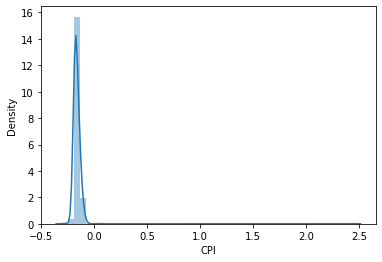

In [ ]:
residual = actualCPI - predictedCPI
sns.distplot(residual)

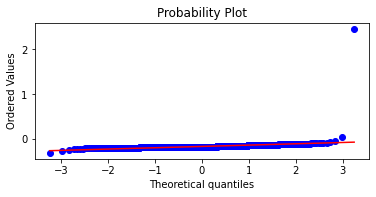

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)


# **Stack**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd


In [ ]:
s = st
intercept = ic
ss = [intercept]
for i in range(1,7):
  ss.append(ss[i-1]+s[i-1])
ss

[0.10028698137295633,
 0.10028698137295633,
 0.10028698137295633,
 0.10028698137295633,
 0.45161991765063275,
 1.1225205427340927,
 1.1816997277515444]

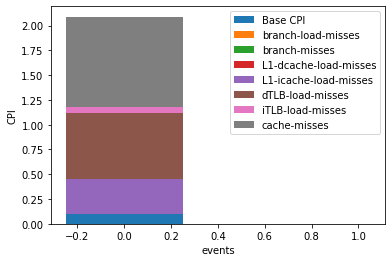

In [ ]:
 
# y-axis in bold
# rc('font', weight='bold')
plt.bar(0,intercept,width =.5, label='Base CPI')
labels = ['branch-load-misses','branch-misses','L1-dcache-load-misses','L1-icache-load-misses','dTLB-load-misses','iTLB-load-misses','cache-misses']
for i in range(7):
  plt.bar(0,s[i], width=.5,bottom =ss[i], label= labels[i])

for i in range(8):
  plt.bar(1,0, width=0.1,bottom = 0)




plt.xlabel('events')

plt.ylabel('CPI')
plt.legend()
# plt.legend(('Base CPI','branch-load-misses','branch-misses','L1-dcache-load-misses','L1-icache-load-misses','dTLB-load-misses','iTLB-load-misses','cache-misses'))
plt.show()